In [1]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

In [2]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

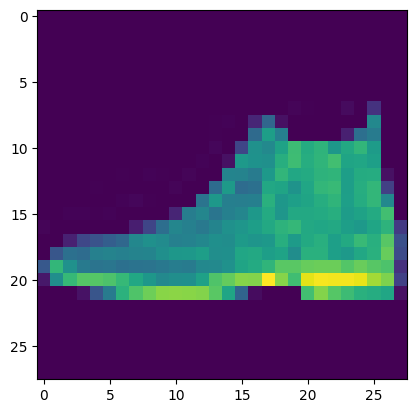

In [20]:
plt.imshow(test_x[0])

In [5]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))
# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
____________________________________________

In [7]:
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 59s 39ms/step - loss: 1.5133 - accuracy: 0.8423 - val_loss: 0.3405 - val_accuracy: 0.8810
Epoch 2/5
1500/1500 [==============================] - 60s 40ms/step - loss: 0.2923 - accuracy: 0.8954 - val_loss: 0.3270 - val_accuracy: 0.8835
Epoch 3/5
1500/1500 [==============================] - 55s 36ms/step - loss: 0.2504 - accuracy: 0.9100 - val_loss: 0.3313 - val_accuracy: 0.8898
Epoch 4/5
1500/1500 [==============================] - 55s 36ms/step - loss: 0.2233 - accuracy: 0.9182 - val_loss: 0.3257 - val_accuracy: 0.8923
Epoch 5/5
1500/1500 [==============================] - 55s 36ms/step - loss: 0.2043 - accuracy: 0.9252 - val_loss: 0.3501 - val_accuracy: 0.8953


In [8]:
loss, acc = model.evaluate(test_x, test_y)
print(loss)
print(acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.3626 - accuracy: 0.8910
0.36263343691825867
0.890999972820282


In [9]:
import matplotlib.pyplot as plt
# To know the labels list
def check_label(id_,labels):
    label = train_y[id_]
    if label not in labels:
        plt.imshow(train_x[id_])
        print("Label Value:",label)
        plt.show()
    return label

Label Value: 9


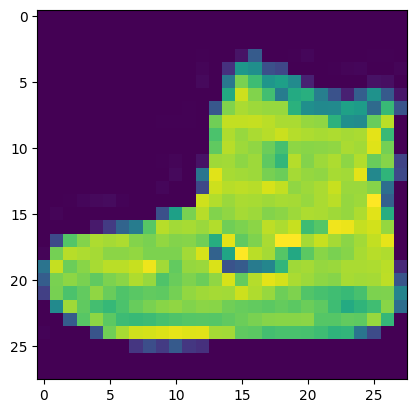

Label Value: 0


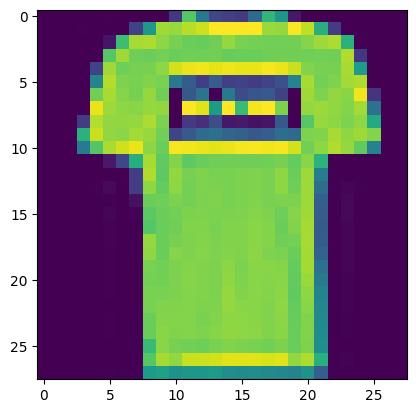

Label Value: 3


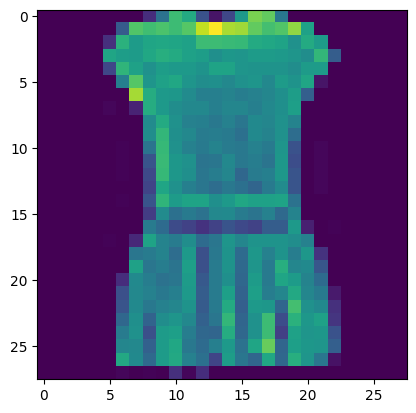

Label Value: 2


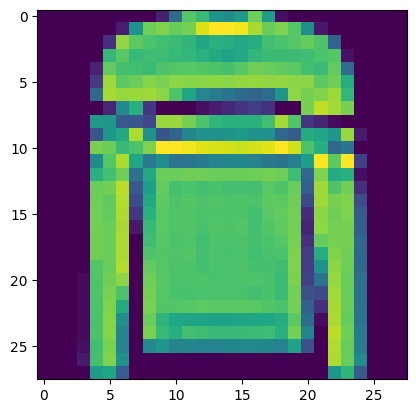

Label Value: 7


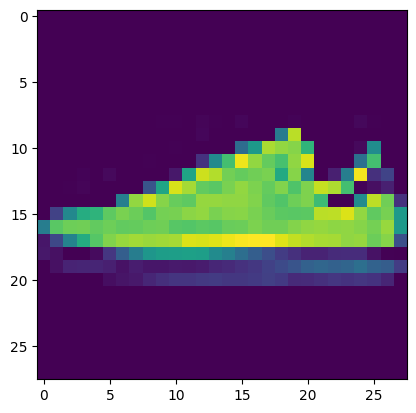

Label Value: 5


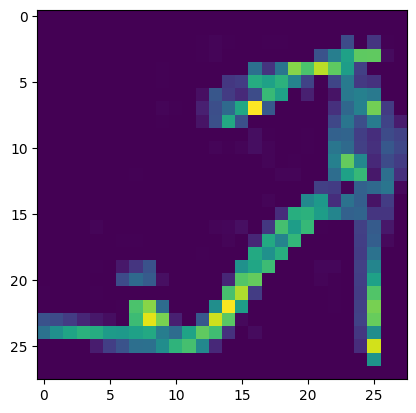

Label Value: 1


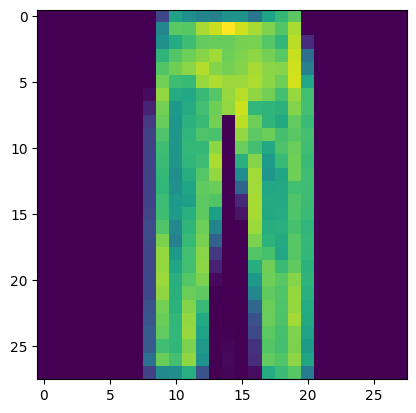

Label Value: 6


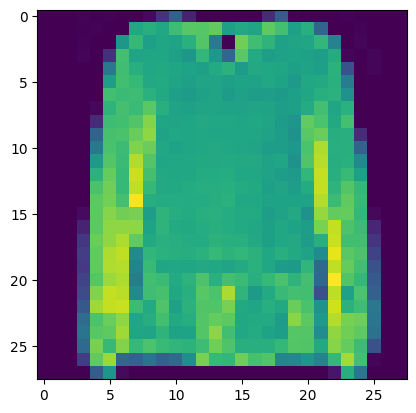

Label Value: 4


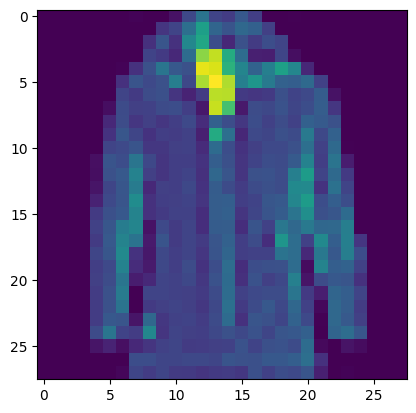

Label Value: 8


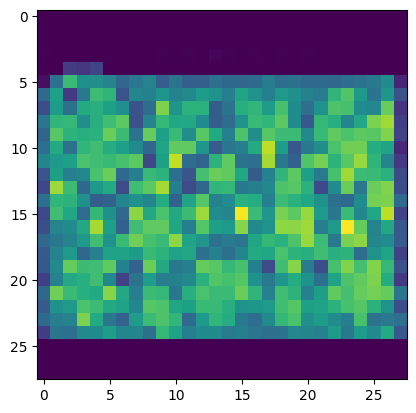

In [10]:
#To know unqiue Labels 
labels=[]
i=0;
while len(labels)<10:
    label = check_label(i,labels)
    if label not in labels:
        labels.append(label)
    i+=1

In [11]:
labels

[9, 0, 3, 2, 7, 5, 1, 6, 4, 8]

In [12]:
def predict(id_):
    labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots'] 
    predictions = model.predict(test_x[id_:id_+1])  # uses array slicing test_x[id_:id_+1] to select the image at index id_ from the test_x dataset
    label = labels[np.argmax(predictions)]   #  find the index of the highest predicted probability in the predictions array.
    print(label)
    plt.imshow(test_x[id_])
    plt.show()

1/1 [==============================] - 0s 193ms/step
trouser


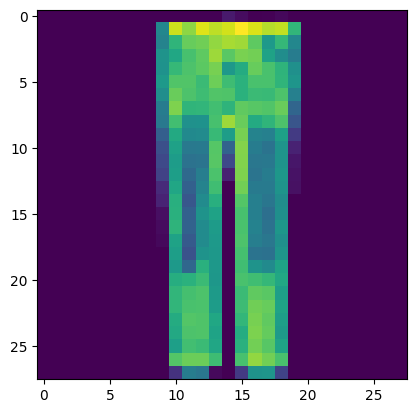

1/1 [==============================] - 0s 46ms/step
pullover


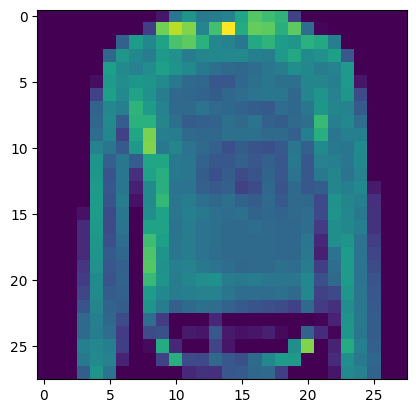

1/1 [==============================] - 0s 33ms/step
coat


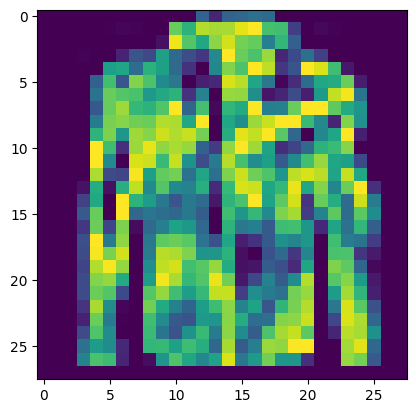

1/1 [==============================] - 0s 51ms/step
bag


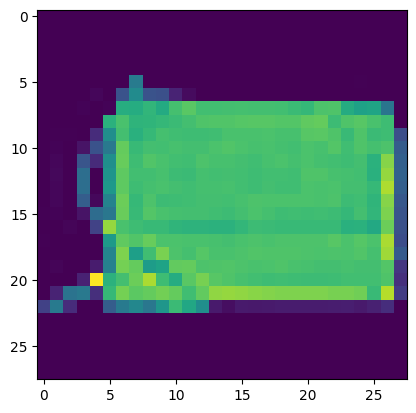

1/1 [==============================] - 0s 31ms/step
t_shirt


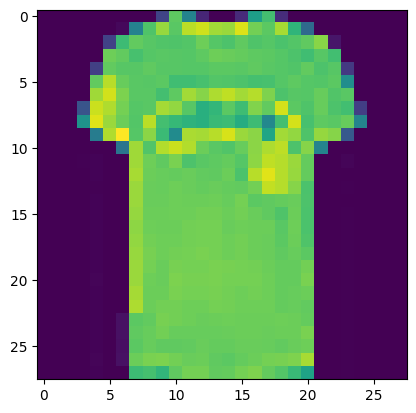

1/1 [==============================] - 0s 48ms/step
pullover


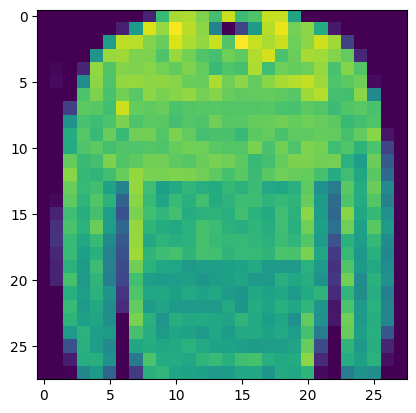

1/1 [==============================] - 0s 35ms/step
sandal


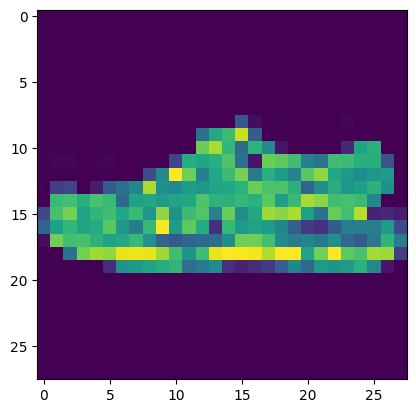

1/1 [==============================] - 0s 38ms/step
sneaker


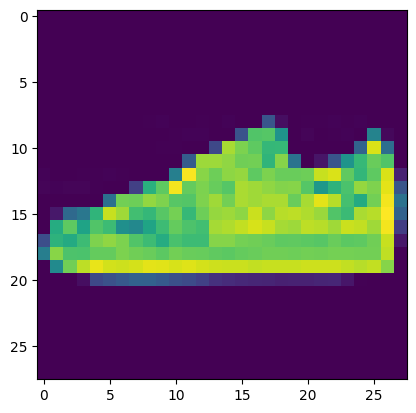

1/1 [==============================] - 0s 37ms/step
sandal


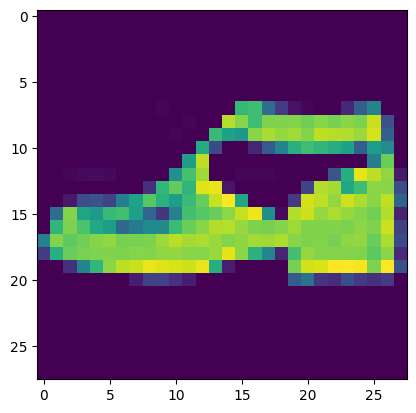

1/1 [==============================] - 0s 39ms/step
trouser


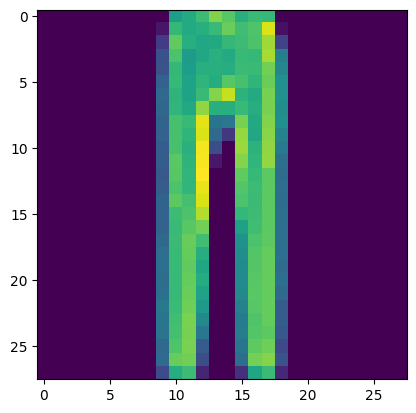

In [13]:
for i in range(15,25):
    predict(i)